<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 147.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 193.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 135.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 170.5 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [39]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [40]:
## Write your code here
freq_employment = df['Employment'].value_counts().idxmax()
median_jobsat = df['JobSat'].median()
freq_remotework = df['RemoteWork'].value_counts().idxmax()

df.loc[:, 'Employment'] = df['Employment'].fillna(freq_employment)
df.loc[:, 'JobSat'] = df['JobSat'].fillna(median_jobsat)
df.loc[:, 'RemoteWork'] = df['RemoteWork'].fillna(freq_remotework)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


ExperienceRange
0-5        7.0
10-20      7.0
5-10       7.0
>20        7.0
Unknown    7.0
Name: JobSat, dtype: float64


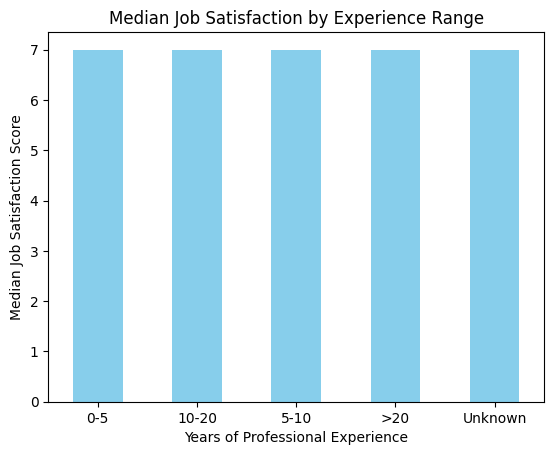

In [48]:
## Write your code here
def create_exp_range(years):
    if pd.isna(years) or years == 'NA' or years == 'null':
        return 'Unknown'
    try:
        # Handle text values first
        if isinstance(years, str):
            if years.lower() == 'less than 1 year':
                return '0-5'
            elif years.lower() == 'more than 50 years':
                return '>20'
            
        # Convert to float for numerical comparison
        years = float(years)
            
        if years < 5:
            return '0-5'
        elif years < 10:
            return '5-10'
        elif years < 20:
            return '10-20'
        else:
            return '>20'
    except:
        return 'Unknown'
        
df['ExperienceRange'] = df['YearsCodePro'].apply(create_exp_range)

median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median()

median_jobsat_by_experience.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=0)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


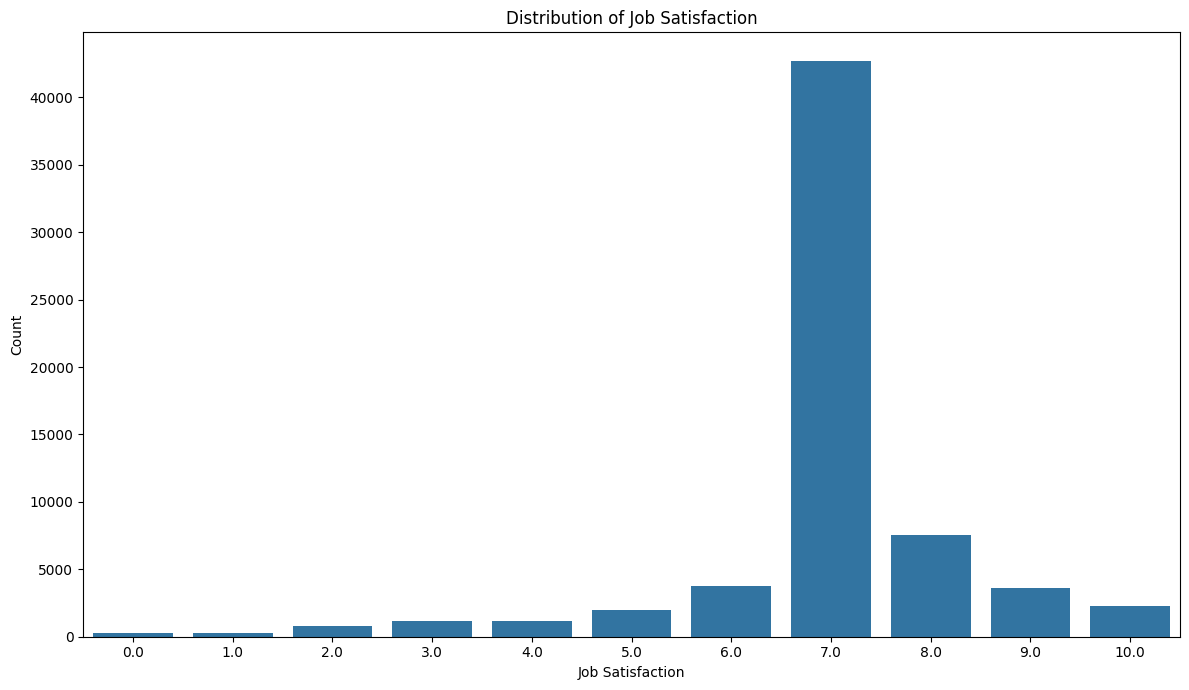

In [44]:
## Write your code here
plt.figure(figsize=(12, 7))
sns.countplot(x='JobSat', data=df)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


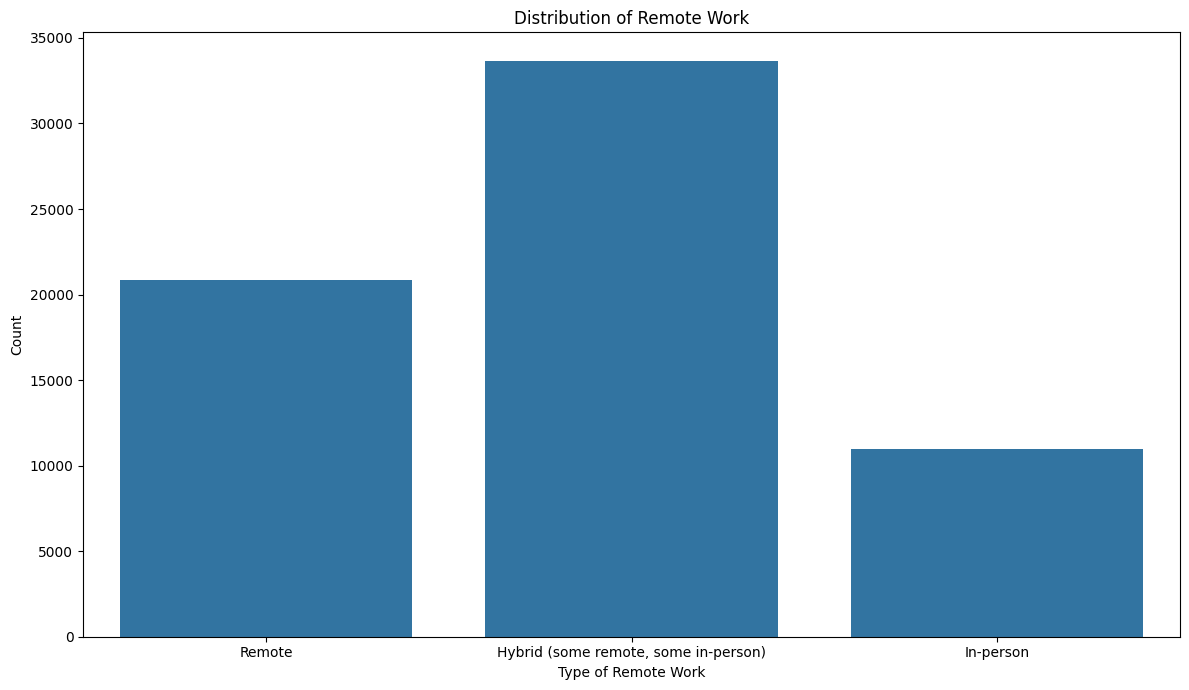

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Employment,,,
"Employed, full-time",17296,8552,13193
"Employed, full-time;Employed, part-time",85,32,95
"Employed, full-time;Independent contractor, freelancer, or self-employed",1330,366,1861
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",80,17,87
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,1,0
...,...,...,...
"Student, full-time;Student, part-time;Employed, part-time",4,1,2
"Student, full-time;Student, part-time;Retired",2,0,0
"Student, part-time",494,0,0


In [52]:
## Write your code here
plt.figure(figsize=(12, 7))
sns.countplot(x='RemoteWork', data=df)
plt.title('Distribution of Remote Work')
plt.xlabel('Type of Remote Work')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

remote_employment = pd.crosstab(
    df['Employment'], 
    df['RemoteWork']
)
remote_employment

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


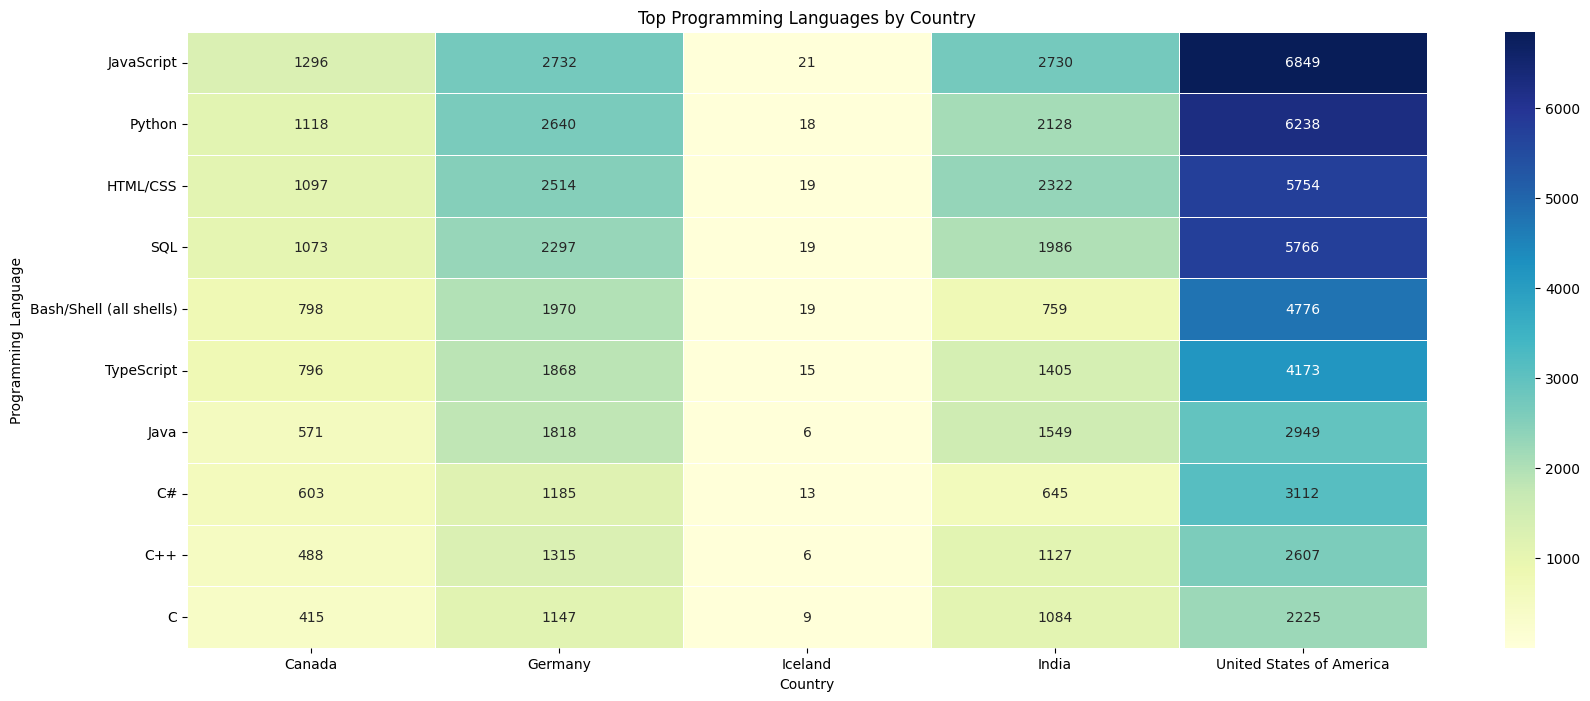

In [58]:
## Write your code here
# Select required columns and drop missing values
lang_region = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Expand multiple languages into separate rows
lang_region_expanded = lang_region.assign(
    Language=lang_region['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Filter for specific regions or countries
# Example: Filter by country
regions_to_analyse = ['United States of America', 'India', 'Germany', 'Iceland', 'Canada']
filtered_df = lang_region_expanded[lang_region_expanded['Country'].isin(regions_to_analyse)]

# Count occurrences by Country and Language
lang_counts = filtered_df.groupby(['Country', 'Language']).size().reset_index(name='Count')

# Pivot for heatmap (Language vs Country)
lang_pivot = lang_counts.pivot(index='Language', columns='Country', values='Count').fillna(0)

# Filter top 10 languages overall
top_languages = lang_counts.groupby('Language')['Count'].sum().nlargest(10).index
lang_pivot_top = lang_pivot.loc[top_languages]

# Plot heatmap for top languages by country
plt.figure(figsize=(20, 8))
sns.heatmap(lang_pivot_top, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Top Programming Languages by Country')
plt.ylabel('Programming Language')
plt.xlabel('Country')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


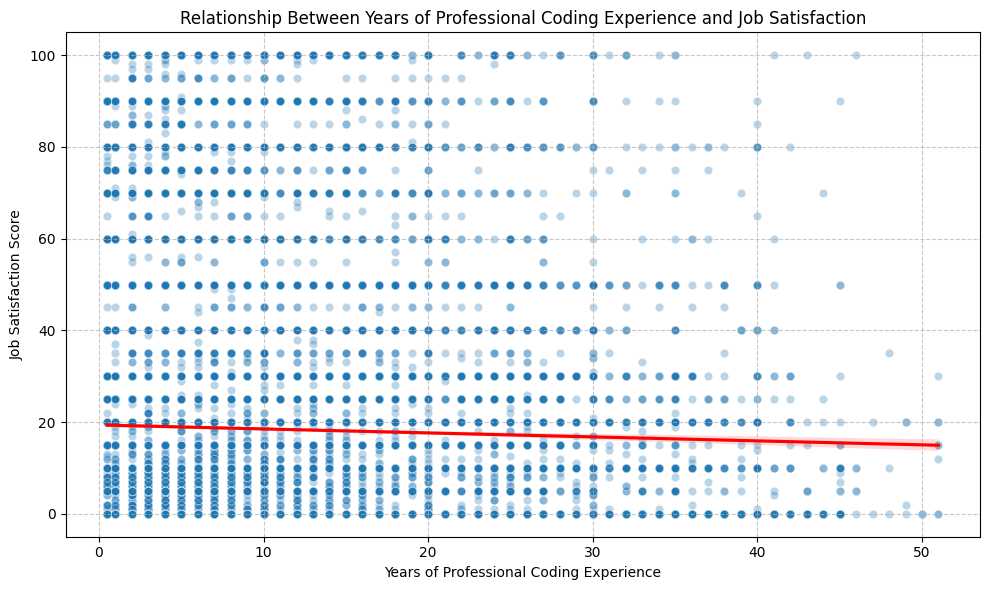

Correlation coefficient: -0.03


In [64]:
## Write your code here
# Create a scatter plot to visualize the relationship between YearsCodePro and job satisfaction
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

plot_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

plt.figure(figsize=(10, 6))

# Use seaborn's scatterplot function for better visualization
sns.scatterplot(data=plot_df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.3)

# Add a regression line to show the trend
sns.regplot(x='YearsCodePro', y='JobSatPoints_1', data=df, 
            scatter=False, line_kws={"color":"red"})

# Add title and labels
plt.title('Relationship Between Years of Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')

# Improve readability with a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = plot_df['YearsCodePro'].astype(float).corr(plot_df['JobSatPoints_1'])
print(f"Correlation coefficient: {correlation:.2f}")

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


<Figure size 1400x800 with 0 Axes>

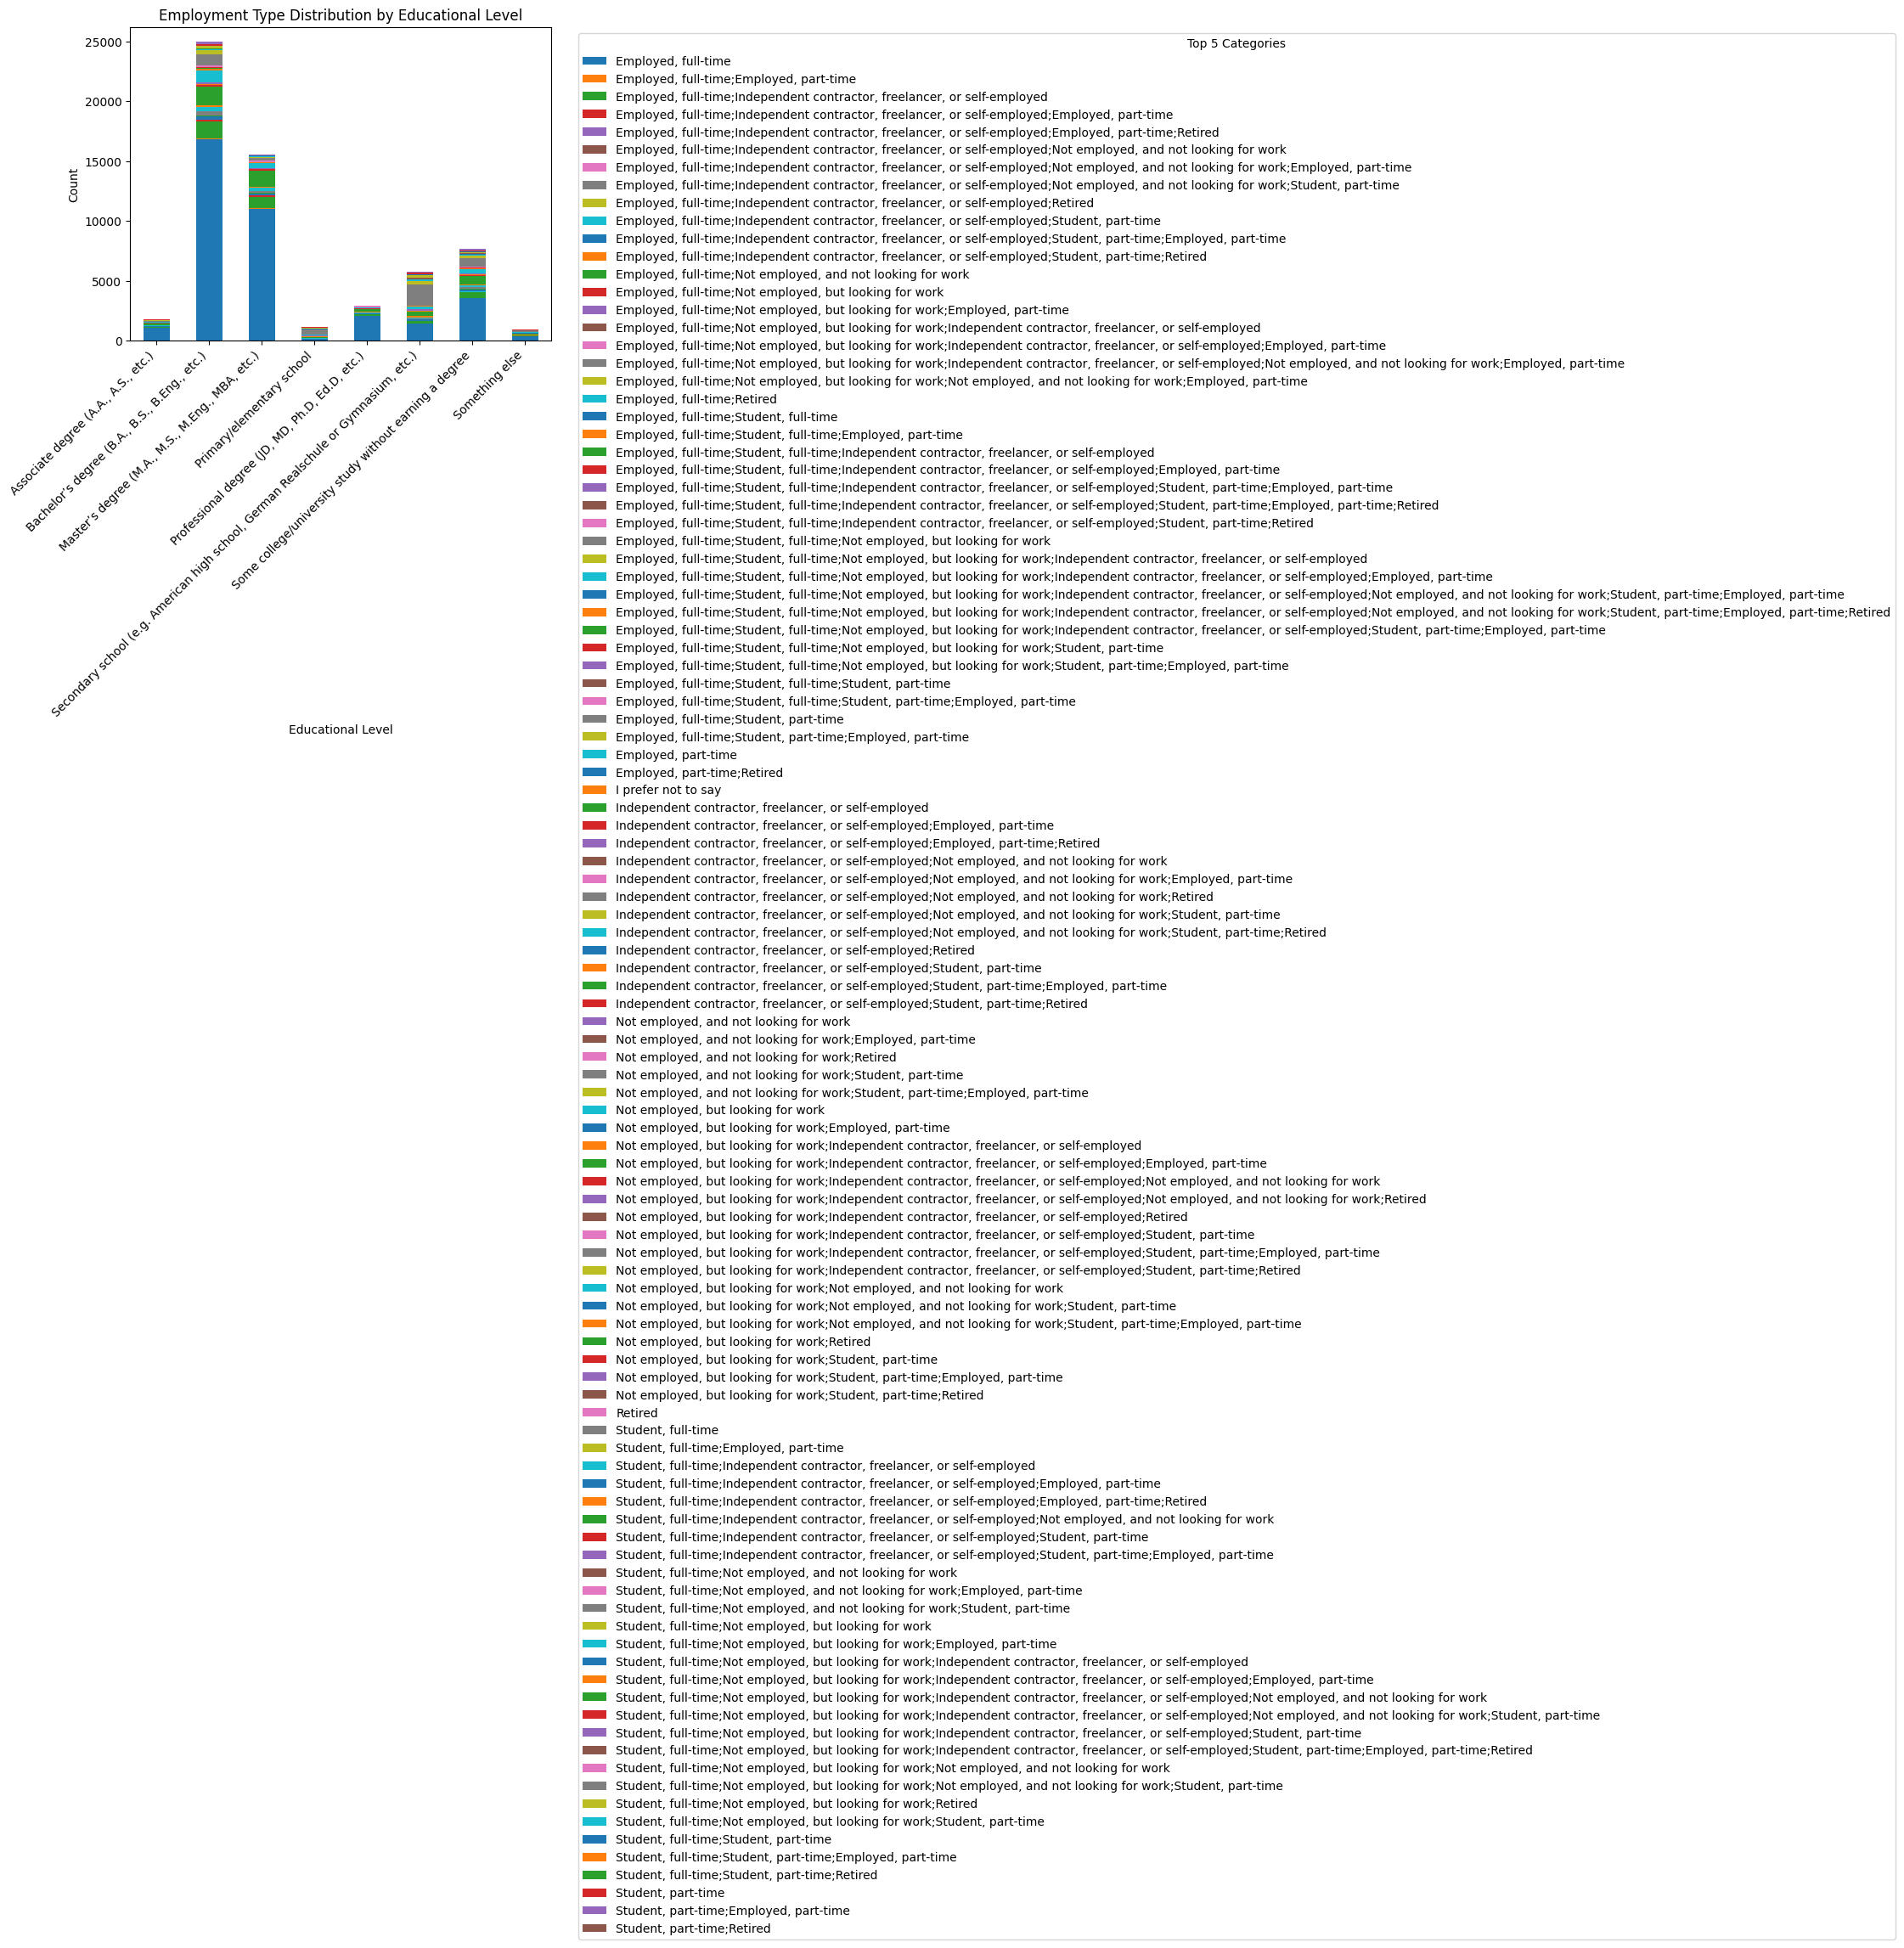

In [74]:
## Write your code here
education_employment = pd.crosstab(
    df['EdLevel'], 
    df['Employment']
)
plt.figure(figsize=(14, 8))
ax = education_employment.plot(
    kind='bar', 
    stacked=True,
    legend=False
)
#handles, labels = ax.get_legend_handles_labels()
# Select only the first 5 items for the legend
ax.legend( 
        title='Top 5 Categories', 
        bbox_to_anchor=(1.05, 1), 
        loc='upper left')

plt.title('Employment Type Distribution by Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [75]:
## Write your code here
df.to_csv('modified_stack_overflow_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
